In [188]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from tqdm import tqdm

In [20]:
def DotsCoordinates(n, k, a):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    
    Возвращает матрицу, в которой построчно записаны координаты точек
    '''
    
    result = np.zeros((k,n))
    for i in range(k):
        result[i] = np.random.uniform(0,a,n)
        
    return result

In [23]:
def EuclidMatrix(coord_matrix):
    
    '''
    coord_matrix - матрица с координатами точек (ее возвращает DotsCoordinates)
    
    Возвращает матрицу, в ячейке [i,j] которой записано евклидово расстояние между i-й и j-й точками матрицы coord_matrix
    '''
    
    result = np.zeros((len(coord_matrix), len(coord_matrix)))
    for i in range(len(result)):
        for j in range(len(result)):
            result[i,j] = distance.euclidean(coord_matrix[i], coord_matrix[j])
            
    return result

In [204]:
def CreateAdjMatrix(euclid_matrix, eps):
    
    '''
    euclid_matrix - матрица евклидовых расстояний между всеми точками пространства
    eps - значение параметра epsilon
    
    Возвращает матрицу смежности графа, в котором i-й и j-й узлы соединены ребрами 
    если евклидовое расстояние между ними меньше epsilon
    '''
    
    result = np.zeros((len(euclid_matrix), len(euclid_matrix)))
    connected_dots = list(zip(*np.where(euclid_matrix < eps)))
    for j in range(len(connected_dots)):
        result[connected_dots[j][0]][connected_dots[j][1]] = 1
        
    return result
    

In [216]:
def ShowGraph(eps_min, eps_max, steps, euclid_matrix):
    
    '''
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    euclid_matrix - матрица евклидовых расстояний между всеми точками пространства
    
    Возвращает график, на котором изображена зависимость количества кластеров от значения epsilon
    '''
    
    components_num = np.array([])
    flag = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components == 1 and flag == False):
            print('Граф стал связным при eps = ', epsilons[i])
            flag = True
    
    fig = plt.figure(figsize=(15,8))
    plt.plot(epsilons, components_num)
    plt.title('Зависимость количества кластеров от значения $\epsilon$', size=15)
    plt.ylabel('Количество кластеров', size=13)
    plt.xlabel('Значение $\epsilon$', size=13)
    plt.legend()
    plt.grid()
    plt.show()
    

Граф стал связным при eps =  8.734


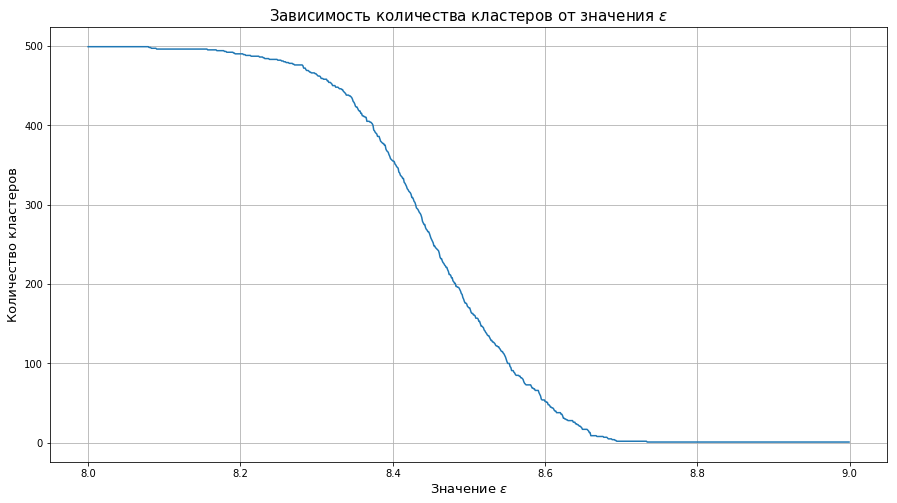

In [220]:
matrix = DotsCoordinates(500, 500, 1)
euc = EuclidMatrix(matrix)
ShowGraph(8,9,1000,euc)

In [211]:
eps = 4
components_num = np.array([])
flag = False
for i in range(800):
    adj_matrix = CreateAdjMatrix(euc, eps)
    components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
    components_num = np.append(components_num, components)
    if (components == 1 and flag == False):
        print('Граф стал связным при eps = ', eps)
        flag = True
    eps += 0.01
    
X = np.arange(4, 12, 0.01)
fig = plt.figure(figsize=(15,8))
plt.plot(X, components_num)
plt.title('Зависимость количества кластеров от значения $\epsilon$', size=15)
plt.ylabel('Количество кластеров', size=13)
plt.xlabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

Граф стал связным при eps =  8.739999999999899


KeyboardInterrupt: 